In [ ]:
import functools 

The Bellman-Ford algorithm uses a simple technique to discover the shortest path between two nodes $i$ and $j$. Let us suppose that our destination node is defined to be node 1, and consider the problem of finding the shortest path from all other nodes to node 1 . It shall be assumed that such a path exists, and that the network is represented by the digraph $G=(V, A)$.
***
**Definition**  
The shortest $(h)$ walk is defined to be,
$$
D_i^{(h)}:=\left\{\begin{array}{l}
\text { shortest path containing at most } h \text { arcs from node } i \text { to node } 1, \\
\text { passing through node } 1 \text { once. }
\end{array}\right.
$$
***

We may now state the algorithm.

***
**Bellman Ford Algorithm**

Initialise for $i \in V$ and denote $d_{i, j}:=\infty$ for $(i, j) \notin A$. Let:
$$
\begin{aligned}
& D_1^{(h)}:=0, \quad \forall h \geq 0 . \\
& D_i^{(0)}:=\infty, \quad \forall i \neq 1 \text {. } \\
&
\end{aligned}
$$


For $h=0$ up to $N-1$ do:
$$
D_i^{(h+1)}:=\min _j\left[D_j^{(h)}+d_{i, j}\right], \quad \forall i \neq 1 .
$$

The algorithm terminates when
$$
D_i^{(h)}=D_i^{(h-1)} \text { for all } i
$$
***
***
**Proposition**

Consider the Bellman-Ford algorithm.
1. The $D_i^{(h)}$ generated by algorithm 4.4 are the shortest $(h)$ walk lengths from $i$ to 1.
2. The algorithm terminates in finite time $h \leq N$ if and only if all cycles not containing 1 have non-negative length. Furthermore, if the algorithm terminates at $h$, then $D_i^{(h)}$ is the shortest path length from $i$ to 1.
***
**Proof:**

(1) We prove by induction on the shortest $(h)$ walk. From the algorithm, we may deduce that for $h=1, D_i^{(1)}=d_{i, 1}$ for all $i \neq 1$, which is the only (hence shortest) (1) walk path from $i$ to 1 .
Suppose the statement holds for all $k \leq h$. A shortest $(h+1)$ walk from $i$ to 1 contains less than $h+1$ arcs, or is an $h+1$ arc walk. In the first case, by our induction hypothesis, the walk has length $D_1^{(h)}$. In the second case, the walk consists of an arc $(i, j)$, for some $j \neq 1$ followed by an $h$ arc walk from $j$ to 1 containing the node 1 only once. By construction, the latter walk must be of length $D_j^{(h)}$. Hence,
$$
\text { shortest }(h+1) \text { walk length }=\min \left\{D_i^{(h)}, \min _{j \neq 1}\left[d_{i, j}+D_j^{(h)}\right]\right\} \text {. }
$$
For $k \leq h$, we have $D_j^{(k)} \leq D_j^{(k-1)}$ by our hypothesis. Therefore,
$$
D_i^{(h+1)}=\min _j\left[d_{i, j}+D_j^{(h)}\right] \leq \min _j\left[d_{i, j}+D_j^{(h-1)}\right]=D_i^{(h)},
$$
and
$$
D_i^{(h)} \leq D_i^{(1)}=d_{i, 1}+D_1^{(h)}
$$
Therefore, we may conclude that the shortest $(h+1)$ walk length is,
$$
\begin{aligned}
& \min \left\{D_i^{(h)}, \min _j\left[d_{i, j}+D_j^{(h)}\right]\right\} \\
& =\min \left\{D_i^{(h)}, D_i^{(h+1)}\right\} \\
& =D_i^{(h+1)}.
\end{aligned}
$$

(2) Suppose the algorithm terminates after a finite number of iterations $N$. Thus, adding more arcs to the shortest walks will not reduce their lengths, and so there cannot exist a cycle of negative-length not containing 1 . Suppose that each cycle not including 1 has non negative length. If we delete all such cycle from a shortest $(h)$ walk, then we would have a path of shorter or equal length. Hence, we must have that a shortest (h) walk exists from $i$ to 1 , for each $h$ and $i$, and it is equal to $D_i^{(h)}$. Since paths have no cycles, they contain at most $N-1 \operatorname{arcs}$. It follows that $D_i^N=D_i^{N-1}$, for all $i$. it follows that the algorithm terminates after at most $\mathrm{N}$ iterations.
<div style='text-align: right'><em> QED</em></div>

In [11]:
class Graph:
    def __init__(self, vertices, directed=False):
        self.V = vertices  # No. of vertices
        self.graph = []
        self.d = directed # Checking if the graph is undirected or not

        self.adjMatrix = []
        for _ in range(vertices):
            self.adjMatrix.append([0 for __ in range(vertices)])
 
    def addEdge(self, u, v, w):
        if self.d == False:
            self.graph.append([u, v, w])
            self.graph.append([v, u, w])
            self.adjMatrix[u][v] = 1
            self.adjMatrix[v][u] = 1
        else:
            self.graph.append([u, v, w])
            self.adjMatrix[u][v] = 1
    
    def BellmanFord(self, src):
        # Initialise
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Iterate
        for _ in range(self.V - 1):
            terminate = True
            for u, v, w in self.graph:
                if dist[v] != float("Inf") and dist[v] + w < dist[u]:
                    terminate = False
                    dist[u] = dist[v] + w
            if terminate == True:
                break
        return dist

### Example
***
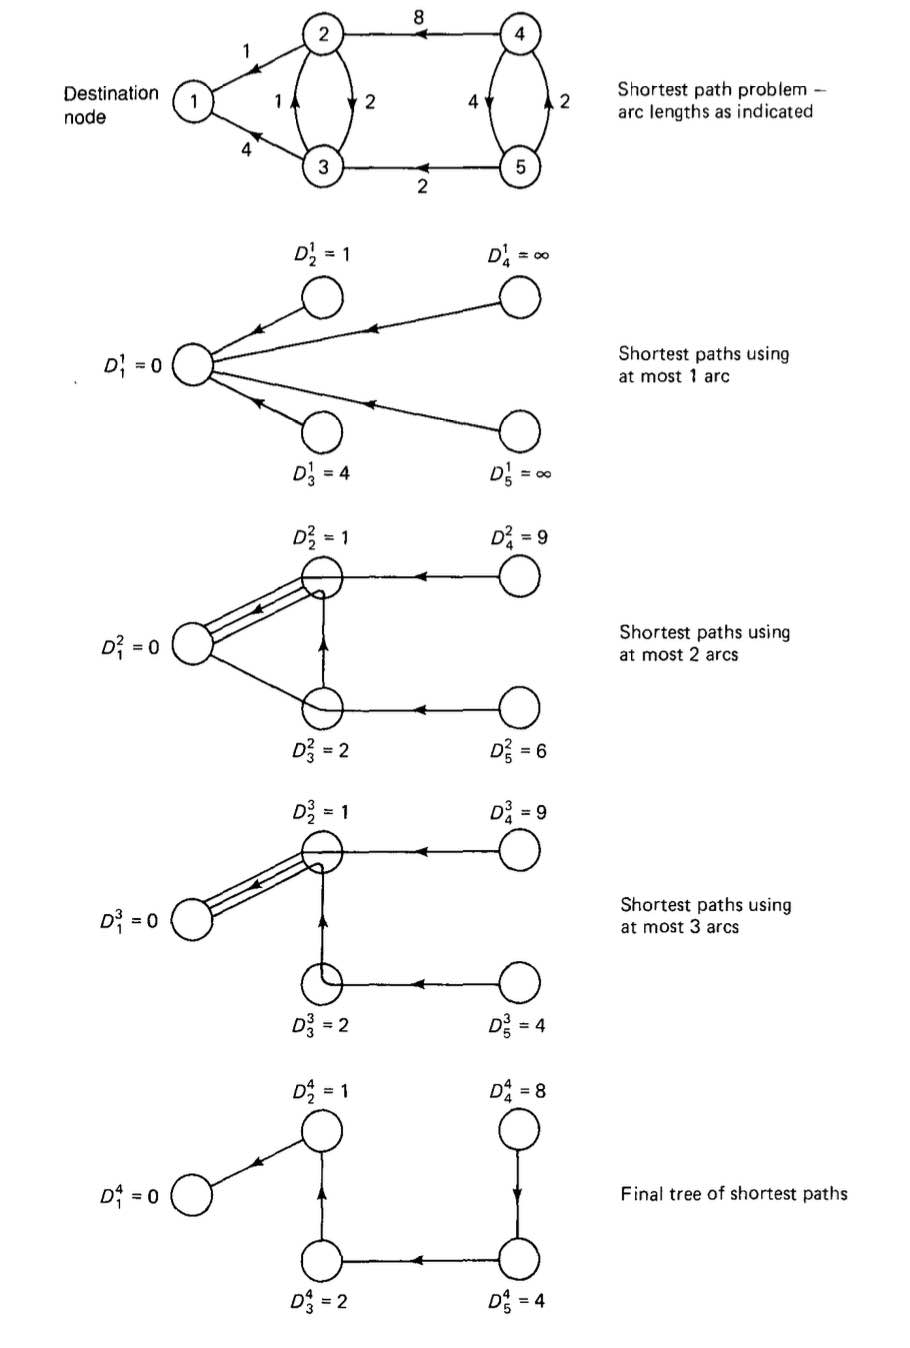

In [14]:
g = Graph(5,True)
g.addEdge(1,0,1)
g.addEdge(2,0,3)
g.addEdge(1,2,2)
g.addEdge(2,1,1)
g.addEdge(3,1,8)
g.addEdge(4,2,2)
g.addEdge(3,4,4)
g.addEdge(4,3,2)

g.BellmanFord(0)

[0, 1, 2, 8, 4]

***
## References

D. Bertsekas, R. Gallager, Data Networks, 2nd edition, Prentice hall, 1992.